# **Logistic Regression**

Logistic Regression is a statistical method for predicting binary classes. The outcome is usually a probability that the given input point belongs to a certain class.

It is a type of regression analysis used for prediction of outcome of a categorical dependent variable based on one or more predictor variables.

In logistic regression, the dependent variable is categorical and the independent variables can be either continuous or categorical.

The logistic function is used to model the relationship between the dependent variable and the independent variables.             
The logistic function is also known as the sigmoid function, which maps any real-valued number into the range of 0 to 1.

Logistic regression is used for binary classification problems, where the output variable can take only two possible values, such as 0 or 1, true or false, yes or no, etc.

Logistic Regression is useful when the target variable is categorical, while SVM Regression is useful when the target variable is continuous.

Linear Regression slope is the coefficient of the independent variable in the linear regression equation and is in a straight line.
Logistic Regression slope is the coefficient of the independent variable in the logistic regression equation and forms an S-shaped curve (sigmoid function).

While in Linear Regression, outcome goes in one direction(upwards or downwards). In Logistic Regression, outcome can be in two directions (0 or 1, True or False, etc.).


In [442]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OrdinalEncoder

In [443]:
d = {'miles_per_week': [37,39,46,51,88,17,18,20,21,22,23,24,25,27,28,29,30,31,32,33,34,38,40,42,57,68,35,36,41,43,45,47,49,50,52,53,54,55,56,58,59,60,61,63,64,65,66,69,70,72,73,75,76,77,78,80,81,82,83,84,85,86,87,89,91,92,93,95,96,97,98,99,100,101,102,103,104,105,106,107,109,110,111,113,114,115,116,116,118,119,120,121,123,124,126,62,67,74,79,90,112], 
     'completed_50m_ultra': ['no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','yes','yes','yes','yes','no','yes','yes','yes','no','yes','yes','yes','yes','yes','yes','yes','yes','no','yes','yes','yes','yes','yes','yes','yes','no','yes','yes','yes','yes','yes','yes','yes','no','yes','yes','yes','yes','yes','yes','yes','no','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes',]
}

In [444]:
df = pd.DataFrame(data=d)

In [445]:
df

,miles_per_week,completed_50m_ultra
0,37,no
1,39,no
2,46,no
3,51,no
4,88,no
...,...,...
96,67,yes
97,74,yes
98,79,yes
99,90,yes


In [446]:
finished_race = ['no', 'yes']
enc = OrdinalEncoder(categories=[finished_race])
df['completed_50m_ultra'] = enc.fit_transform(df[['completed_50m_ultra']])

In [447]:
df

,miles_per_week,completed_50m_ultra
0,37,0.0
1,39,0.0
2,46,0.0
3,51,0.0
4,88,0.0
...,...,...
96,67,1.0
97,74,1.0
98,79,1.0
99,90,1.0


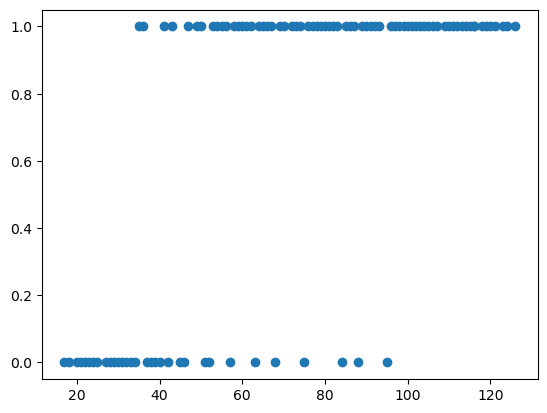

In [448]:
from matplotlib import pyplot as plt

plt.scatter(df['miles_per_week'], df['completed_50m_ultra'])

C:\Users\anany\AppData\Local\Temp\ipykernel_1516\1904061665.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='completed_50m_ultra', data=df, palette='Set1')


<Axes: xlabel='completed_50m_ultra', ylabel='count'>

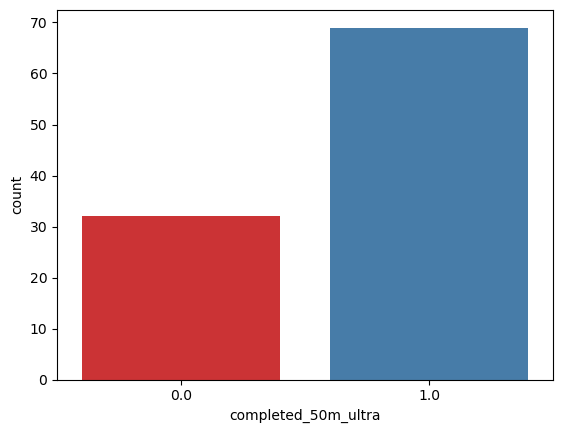

In [449]:
import seaborn as sns

sns.countplot(x='completed_50m_ultra', data=df, palette='Set1')

In [450]:
X = df.iloc[:, 0:1]
y = df.iloc[:, 1]

In [451]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

In [452]:
print(X_train.shape, y_train.shape)

(70, 1) (70,)


In [453]:
print(X_test.shape, y_test.shape)

(31, 1) (31,)


In [454]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [455]:
y_pred = log_reg.predict(X_test)
display(y_pred)

array([1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1.,
       0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0.])

In [456]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error

print("Logistic Regression Score:", log_reg.score(X_test, y_test))
print("Logistic Regression R2 Score:", r2_score(y_test, y_pred))
print("Logistic Regression Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Logistic Regression Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Logistic Regression Root Mean Squared Error:", root_mean_squared_error(y_test, y_pred))

Logistic Regression Score: 0.8709677419354839
Logistic Regression R2 Score: 0.26190476190476186
Logistic Regression Mean Absolute Error: 0.12903225806451613
Logistic Regression Mean Squared Error: 0.12903225806451613
Logistic Regression Root Mean Squared Error: 0.3592106040535498


In [457]:
log_reg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'deprecated',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [458]:
# n_jobs is used to specify the number of CPU cores to use during the computation.
# less than 0 means using all processors.
# max_iter is the maximum number of iterations for the solver to converge
# C is the inverse of regularization strength; smaller values specify stronger regularization
# class_weight is used to handle imbalanced datasets by assigning weights to classes. 
# 'balanced' automatically adjusts weights inversely proportional to class frequencies in the input data. 'dict' allows you to specify custom weights for each class.
log_reg_2 = LogisticRegression(max_iter=400, C=0.2, solver='liblinear')
log_reg_2.fit(X_train, y_train)

LogisticRegression(C=0.2, max_iter=400, solver='liblinear')

In [459]:
y_pred_2 = log_reg_2.predict(X_test)
display(y_pred_2)

array([1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [460]:
print("Logistic Regression 2 Score:", log_reg_2.score(X_test, y_test))
print("Logistic Regression 2 R2 Score:", r2_score(y_test, y_pred_2))
print("Logistic Regression 2 Mean Absolute Error:", mean_absolute_error(y_test, y_pred_2))
print("Logistic Regression 2 Mean Squared Error:", mean_squared_error(y_test, y_pred_2))
print("Logistic Regression 2 Root Mean Squared Error:", root_mean_squared_error(y_test, y_pred_2))

Logistic Regression 2 Score: 0.9032258064516129
Logistic Regression 2 R2 Score: 0.4464285714285714
Logistic Regression 2 Mean Absolute Error: 0.0967741935483871
Logistic Regression 2 Mean Squared Error: 0.0967741935483871
Logistic Regression 2 Root Mean Squared Error: 0.3110855084191276


In [461]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred))
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

print("Logistic Regression 2 Accuracy:", accuracy_score(y_test, y_pred_2))
print("Logistic Regression 2 Classification Report:\n", classification_report(y_test, y_pred_2))
print("Logistic Regression 2 Confusion Matrix:\n", confusion_matrix(y_test, y_pred_2))  


Logistic Regression Accuracy: 0.8709677419354839
Logistic Regression Classification Report:
               precision    recall  f1-score   support

         0.0       0.67      0.86      0.75         7
         1.0       0.95      0.88      0.91        24

    accuracy                           0.87        31
   macro avg       0.81      0.87      0.83        31
weighted avg       0.89      0.87      0.88        31

Logistic Regression Confusion Matrix:
 [[ 6  1]
 [ 3 21]]
Logistic Regression 2 Accuracy: 0.9032258064516129
Logistic Regression 2 Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.57      0.73         7
         1.0       0.89      1.00      0.94        24

    accuracy                           0.90        31
   macro avg       0.94      0.79      0.83        31
weighted avg       0.91      0.90      0.89        31

Logistic Regression 2 Confusion Matrix:
 [[ 4  3]
 [ 0 24]]
